In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences #for padding after tokenizing texts
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

tokenizer= Tokenizer()
data= "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \n His father died and made him a man again \n Left him a farm and ten acres of ground. \n He gave a grand party for friends and relations \n Who didnt forget him when come to the wall, \n And if youll but listen Ill make your eyes glisten \n Of the rows and the ructions of Lanigan's Ball. \n Myself to be sure got free invitation, \n For all the nice girls and boys I might ask, And just in a minute both friends and relations Were dancing round merry as bees round a cask. \n Judy ODaly, that nice little milliner, She tripped me a wink for to give her a call, \n And I soon arrived with Peggy McGiligan \n Just in time for Lanigans Ball"
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words= len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'a': 2, 'the': 3, 'of': 4, 'for': 5, 'in': 6, 'him': 7, 'to': 8, 'he': 9, 'friends': 10, 'relations': 11, 'ball': 12, 'nice': 13, 'i': 14, 'just': 15, 'round': 16, 'town': 17, 'athy': 18, 'one': 19, 'jeremy': 20, 'lanigan': 21, 'battered': 22, 'away': 23, 'til': 24, 'hadnt': 25, 'pound': 26, 'his': 27, 'father': 28, 'died': 29, 'made': 30, 'man': 31, 'again': 32, 'left': 33, 'farm': 34, 'ten': 35, 'acres': 36, 'ground': 37, 'gave': 38, 'grand': 39, 'party': 40, 'who': 41, 'didnt': 42, 'forget': 43, 'when': 44, 'come': 45, 'wall': 46, 'if': 47, 'youll': 48, 'but': 49, 'listen': 50, 'ill': 51, 'make': 52, 'your': 53, 'eyes': 54, 'glisten': 55, 'rows': 56, 'ructions': 57, "lanigan's": 58, 'myself': 59, 'be': 60, 'sure': 61, 'got': 62, 'free': 63, 'invitation': 64, 'all': 65, 'girls': 66, 'boys': 67, 'might': 68, 'ask': 69, 'minute': 70, 'both': 71, 'were': 72, 'dancing': 73, 'merry': 74, 'as': 75, 'bees': 76, 'cask': 77, 'judy': 78, 'odaly': 79, 'that': 80, 'little': 81, 'milli

In [37]:
input_sequences= []
for line in corpus:
    #token_list returns list of tokens corresponding to line
    token_list= tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    for i in range(1, len(token_list)):
        n_gram_sequence= token_list[:i+1]
        input_sequences.append(n_gram_sequence)
    #print(input_sequences)
        
#pad sequences
max_sequence_len= max([len(x) for x in input_sequences])
input_sequences= np.array(pad_sequences(input_sequences, maxlen= max_sequence_len, padding='pre'))

#create predictors and labels
xs, labels= input_sequences[:,:-1], input_sequences[:,-1]
#print(input_sequences)
#print(labels)
#ys is labels list *1 hot encoded*  !! last word-token in each line is label for that line
ys= tf.keras.utils.to_categorical(labels, num_classes= total_words)

[[ 0  0  0 ...  0  6  3]
 [ 0  0  0 ...  6  3 17]
 [ 0  0  0 ...  3 17  4]
 ...
 [ 0  0  0 ...  6 95  5]
 [ 0  0  0 ... 95  5 96]
 [ 0  0  0 ...  5 96 12]]
[ 3 17  4 18 19 20 21 23 24  9 25  2 26 28 29  1 30  7  2 31 32  7  2 34
  1 35 36  4 37 38  2 39 40  5 10  1 11 42 43  7 44 45  8  3 46 47 48 49
 50 51 52 53 54 55  3 56  1  3 57  4 58 12  8 60 61 62 63 64 65  3 13 66
  1 67 14 68 69  1 15  6  2 70 71 10  1 11 72 73 16 74 75 76 16  2 77 79
 80 13 81 82 83 84 85  2 86  5  8 87 88  2 89 14 90 91 92 93 94  6 95  5
 96 12]


In [27]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

6
3
17
4
18
19
20
21


In [30]:
print(xs[6])  #token sequnece for complete 1st sentence except last word that acts as label

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  3 17  4
 18 19 20]


In [7]:
print(ys[6])   #1 at 21th position

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [8]:
model= Sequential()
model.add(Embedding(total_words, 64, input_length= max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))   # here 64 is desired output size from LSTM layer. using Bidirectional cell state will give output size 128
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])
history= model.fit(xs, ys, epochs=500, verbose=1)


Train on 122 samples
Epoch 1/500
122/122 [==============================] - 3s 25ms/sample - loss: 4.5758 - accuracy: 0.0000e+00
Epoch 2/500
122/122 [==============================] - 0s 493us/sample - loss: 4.5667 - accuracy: 0.0164
Epoch 3/500
122/122 [==============================] - 0s 503us/sample - loss: 4.5597 - accuracy: 0.0492
Epoch 4/500
122/122 [==============================] - 0s 533us/sample - loss: 4.5520 - accuracy: 0.1148
Epoch 5/500
122/122 [==============================] - 0s 513us/sample - loss: 4.5424 - accuracy: 0.1148
Epoch 6/500
122/122 [==============================] - 0s 531us/sample - loss: 4.5301 - accuracy: 0.1148
Epoch 7/500
122/122 [==============================] - 0s 524us/sample - loss: 4.5146 - accuracy: 0.1066
Epoch 8/500
122/122 [==============================] - 0s 515us/sample - loss: 4.4913 - accuracy: 0.0820
Epoch 9/500
122/122 [==============================] - 0s 525us/sample - loss: 4.4601 - accuracy: 0.0820
Epoch 10/500
122/122 [=========

122/122 [==============================] - 0s 548us/sample - loss: 2.6252 - accuracy: 0.3033
Epoch 79/500
122/122 [==============================] - 0s 465us/sample - loss: 2.6055 - accuracy: 0.3197
Epoch 80/500
122/122 [==============================] - 0s 502us/sample - loss: 2.5932 - accuracy: 0.3115
Epoch 81/500
122/122 [==============================] - 0s 476us/sample - loss: 2.5816 - accuracy: 0.3279
Epoch 82/500
122/122 [==============================] - 0s 451us/sample - loss: 2.5460 - accuracy: 0.3361
Epoch 83/500
122/122 [==============================] - 0s 459us/sample - loss: 2.5385 - accuracy: 0.3197
Epoch 84/500
122/122 [==============================] - 0s 456us/sample - loss: 2.5055 - accuracy: 0.3689
Epoch 85/500
122/122 [==============================] - 0s 512us/sample - loss: 2.4860 - accuracy: 0.3770
Epoch 86/500
122/122 [==============================] - 0s 559us/sample - loss: 2.4645 - accuracy: 0.3770
Epoch 87/500
122/122 [==============================] - 0s 

122/122 [==============================] - 0s 581us/sample - loss: 1.4621 - accuracy: 0.8525
Epoch 155/500
122/122 [==============================] - 0s 569us/sample - loss: 1.4500 - accuracy: 0.8525
Epoch 156/500
122/122 [==============================] - 0s 448us/sample - loss: 1.4367 - accuracy: 0.8525
Epoch 157/500
122/122 [==============================] - 0s 520us/sample - loss: 1.4244 - accuracy: 0.8525
Epoch 158/500
122/122 [==============================] - 0s 481us/sample - loss: 1.4133 - accuracy: 0.8607
Epoch 159/500
122/122 [==============================] - 0s 473us/sample - loss: 1.4018 - accuracy: 0.8525
Epoch 160/500
122/122 [==============================] - 0s 455us/sample - loss: 1.3903 - accuracy: 0.8607
Epoch 161/500
122/122 [==============================] - 0s 482us/sample - loss: 1.3797 - accuracy: 0.8525
Epoch 162/500
122/122 [==============================] - 0s 481us/sample - loss: 1.3689 - accuracy: 0.8689
Epoch 163/500
122/122 [============================

122/122 [==============================] - 0s 532us/sample - loss: 0.7951 - accuracy: 0.9508
Epoch 231/500
122/122 [==============================] - 0s 556us/sample - loss: 0.7877 - accuracy: 0.9508
Epoch 232/500
122/122 [==============================] - 0s 533us/sample - loss: 0.7810 - accuracy: 0.9508
Epoch 233/500
122/122 [==============================] - 0s 526us/sample - loss: 0.7755 - accuracy: 0.9508
Epoch 234/500
122/122 [==============================] - 0s 526us/sample - loss: 0.7677 - accuracy: 0.9508
Epoch 235/500
122/122 [==============================] - 0s 520us/sample - loss: 0.7620 - accuracy: 0.9508
Epoch 236/500
122/122 [==============================] - 0s 526us/sample - loss: 0.7560 - accuracy: 0.9508
Epoch 237/500
122/122 [==============================] - 0s 565us/sample - loss: 0.7502 - accuracy: 0.9508
Epoch 238/500
122/122 [==============================] - 0s 503us/sample - loss: 0.7453 - accuracy: 0.9508
Epoch 239/500
122/122 [============================

122/122 [==============================] - 0s 557us/sample - loss: 0.4452 - accuracy: 0.9836
Epoch 307/500
122/122 [==============================] - 0s 551us/sample - loss: 0.4418 - accuracy: 0.9754
Epoch 308/500
122/122 [==============================] - 0s 525us/sample - loss: 0.4394 - accuracy: 0.9918
Epoch 309/500
122/122 [==============================] - 0s 533us/sample - loss: 0.4356 - accuracy: 0.9836
Epoch 310/500
122/122 [==============================] - 0s 574us/sample - loss: 0.4333 - accuracy: 0.9918
Epoch 311/500
122/122 [==============================] - 0s 520us/sample - loss: 0.4290 - accuracy: 0.9918
Epoch 312/500
122/122 [==============================] - 0s 510us/sample - loss: 0.4257 - accuracy: 0.9918
Epoch 313/500
122/122 [==============================] - 0s 542us/sample - loss: 0.4224 - accuracy: 0.9918
Epoch 314/500
122/122 [==============================] - 0s 538us/sample - loss: 0.4197 - accuracy: 0.9918
Epoch 315/500
122/122 [============================

122/122 [==============================] - 0s 506us/sample - loss: 0.2553 - accuracy: 0.9918
Epoch 383/500
122/122 [==============================] - 0s 510us/sample - loss: 0.2541 - accuracy: 0.9918
Epoch 384/500
122/122 [==============================] - 0s 447us/sample - loss: 0.2521 - accuracy: 0.9918
Epoch 385/500
122/122 [==============================] - 0s 427us/sample - loss: 0.2509 - accuracy: 0.9836
Epoch 386/500
122/122 [==============================] - 0s 490us/sample - loss: 0.2486 - accuracy: 0.9918
Epoch 387/500
122/122 [==============================] - 0s 443us/sample - loss: 0.2472 - accuracy: 0.9918
Epoch 388/500
122/122 [==============================] - 0s 442us/sample - loss: 0.2458 - accuracy: 0.9918
Epoch 389/500
122/122 [==============================] - 0s 462us/sample - loss: 0.2441 - accuracy: 0.9918
Epoch 390/500
122/122 [==============================] - 0s 438us/sample - loss: 0.2426 - accuracy: 0.9918
Epoch 391/500
122/122 [============================

122/122 [==============================] - 0s 451us/sample - loss: 0.1633 - accuracy: 0.9836
Epoch 459/500
122/122 [==============================] - 0s 497us/sample - loss: 0.1624 - accuracy: 0.9918
Epoch 460/500
122/122 [==============================] - 0s 433us/sample - loss: 0.1612 - accuracy: 0.9918
Epoch 461/500
122/122 [==============================] - 0s 430us/sample - loss: 0.1605 - accuracy: 0.9836
Epoch 462/500
122/122 [==============================] - 0s 457us/sample - loss: 0.1602 - accuracy: 0.9918
Epoch 463/500
122/122 [==============================] - 0s 447us/sample - loss: 0.1595 - accuracy: 0.9836
Epoch 464/500
122/122 [==============================] - 0s 444us/sample - loss: 0.1579 - accuracy: 0.9836
Epoch 465/500
122/122 [==============================] - 0s 452us/sample - loss: 0.1569 - accuracy: 0.9918
Epoch 466/500
122/122 [==============================] - 0s 440us/sample - loss: 0.1561 - accuracy: 0.9836
Epoch 467/500
122/122 [============================

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    accu= history.history[string]
    epochs= [x for x in range(1,501)]
    plt.plot(epochs, accu)
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

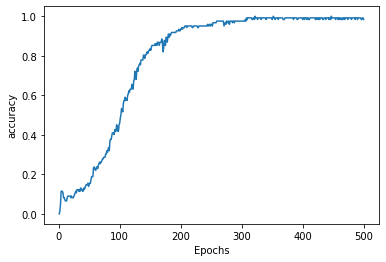

In [23]:
plot_graphs(history, "accuracy")

In [53]:
#predicting next words

seed_text= 'Garima again went to dublin'
next_words= 10 #we want to predict 10 words after above sequence

for i in range(next_words):
    token_list= tokenizer.texts_to_sequences([seed_text])[0]
    #pad the above sequence
    token_list= pad_sequences([token_list], maxlen= max_sequence_len-1, padding='pre')

    #this will give us the token of the word most likely to be next in the sequence
    predicted= model.predict_classes(token_list, verbose=0)
    
    
    #now we'll reverse the word_index dictionary to get the word corresponding to predicted token
    #to add the word at last of the given sequence
    
    for word, index in tokenizer.word_index.items():
        if index==predicted:
            output_word= word
            break
    seed_text += " " + output_word
print(seed_text)

Garima again went to dublin and left the town of lanigan's ball ball ball ball ball ball ball ball
